# Working with Files and Google Drive

## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
images_path = "/content/drive/MyDrive/Colab Notebooks/deep_learning_course_materials/01_introduction/face_recognition_files/faces_lecture"

In [ ]:
img_path = "/content/drive/MyDrive/Colab Notebooks/deep_learning_course_materials/01_introduction/face_recognition_files/faces_lecture/face11.png"

# Helper Functions

In [ ]:
# unzipfiles

In [ ]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to_folder):

    if not os.path.exists(zip_file_path):
        print(f"The zip file {zip_file_path} does not exist.")
        return
    if not os.path.exists(extract_to_folder):
        os.makedirs(extract_to_folder)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_folder)
        print(f"Files extracted to {extract_to_folder}")

zip_file_path = "/content/face_recognition_files.zip"

extract_to_folder = "/content"

unzip_file(zip_file_path, extract_to_folder)

In [ ]:
# delete all files in directory

In [ ]:
import shutil
import os

def delete_all_files_in_directory(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

directory = '/content/faces_lecture'

delete_all_files_in_directory(directory)

# Face Recognition

Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python. It is a hybrid face recognition framework wrapping state-of-the-art models: VGG-Face, FaceNet, OpenFace, DeepFace, DeepID, ArcFace, Dlib, SFace and GhostFaceNet.

https://github.com/serengil/deepface



In [ ]:
!pip install deepface

In [4]:
from deepface import DeepFace
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

24-05-26 13:06:45 - Directory /root/.deepface created
24-05-26 13:06:45 - Directory /root/.deepface/weights created


## Age Detection

In [5]:
DeepFace.analyze(img_path = img_path, actions=['age'])

24-05-26 13:07:58 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:07<00:00, 67.4MB/s]


[{'age': 24,
  'region': {'x': 301,
   'y': 453,
   'w': 1312,
   'h': 1312,
   'left_eye': (1230, 948),
   'right_eye': (697, 947)},
  'face_confidence': 0.89}]

In [6]:
result = DeepFace.analyze(img_path=img_path, actions=['age'])

In [7]:
def visualize_attribute(img_path, result, attribute = "age"):

    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if attribute in result[0]:

        prediction = result[0][attribute]

        text = f"{attribute}: {prediction}"
    else:
        text = f"{attribute} not found in result"

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.5
    thickness = 2
    color = (255, 255, 255)
    shadow_color = (0, 0, 0)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(text)
    plt.show()

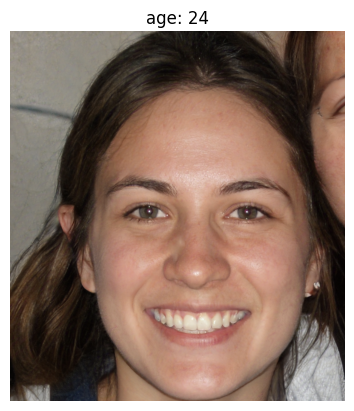

In [8]:
visualize_attribute(img_path, result, "age")

In [9]:

image_paths = [os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]



In [10]:
image_paths

['/content/drive/MyDrive/Colab Notebooks/deep_learning_course_materials/01_introduction/face_recognition_files/faces_lecture/face11.png',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_course_materials/01_introduction/face_recognition_files/faces_lecture/face12.png',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_course_materials/01_introduction/face_recognition_files/faces_lecture/face13.png',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_course_materials/01_introduction/face_recognition_files/faces_lecture/face14.png',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_course_materials/01_introduction/face_recognition_files/faces_lecture/face15.png',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_course_materials/01_introduction/face_recognition_files/faces_lecture/face16.png',
 '/content/drive/MyDrive/Colab Notebooks/deep_learning_course_materials/01_introduction/face_recognition_files/faces_lecture/face17.png',
 '/content/drive/MyDrive/Colab Not

In [11]:
for path in image_paths:
    result = DeepFace.analyze(path, actions=['age'])
    visualize_attribute(path, result)



Output hidden; open in https://colab.research.google.com to view.

## Gender Detection

In [12]:
DeepFace.analyze(img_path=img_path, actions=['gender'])

24-05-26 13:19:18 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:07<00:00, 73.3MB/s]


[{'gender': {'Woman': 57.12386965751648, 'Man': 42.87613332271576},
  'dominant_gender': 'Woman',
  'region': {'x': 301,
   'y': 453,
   'w': 1312,
   'h': 1312,
   'left_eye': (1230, 948),
   'right_eye': (697, 947)},
  'face_confidence': 0.89}]

In [13]:
result = DeepFace.analyze(img_path=img_path, actions=['gender'])

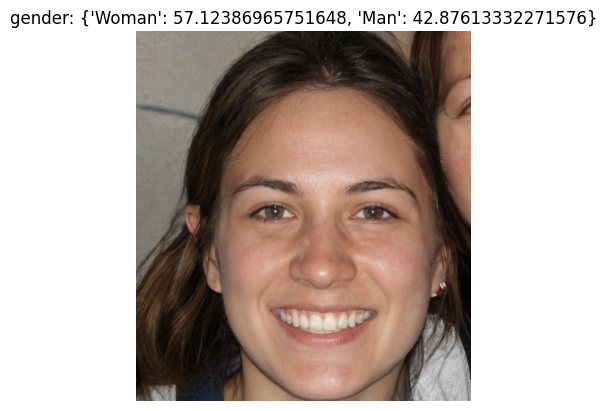

In [14]:
visualize_attribute(img_path, result, "gender")

In [15]:
for path in image_paths:

    result = DeepFace.analyze(path, actions=['gender'])

    visualize_attribute(path, result, "gender")

Output hidden; open in https://colab.research.google.com to view.

## Race Detection

In [16]:
DeepFace.analyze(img_path=img_path, actions=['race'])

24-05-26 13:21:42 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:02<00:00, 240MB/s]


[{'race': {'asian': 1.3934370960853752,
   'indian': 0.5774800078558926,
   'black': 0.12251004375577233,
   'white': 60.89895730608447,
   'middle eastern': 14.439090456908373,
   'latino hispanic': 22.56852671912472},
  'dominant_race': 'white',
  'region': {'x': 301,
   'y': 453,
   'w': 1312,
   'h': 1312,
   'left_eye': (1230, 948),
   'right_eye': (697, 947)},
  'face_confidence': 0.89}]

In [17]:
for path in image_paths:
    result = DeepFace.analyze(path, actions=['race'])


    visualize_attribute(path, result, "race")

Output hidden; open in https://colab.research.google.com to view.

## Emotion Detection

In [18]:
DeepFace.analyze(img_path=img_path, actions=['emotion'])

24-05-26 13:23:14 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 19.3MB/s]


[{'emotion': {'angry': 9.140372486671211e-10,
   'disgust': 2.002400180990151e-14,
   'fear': 7.317185080069066e-07,
   'happy': 99.81246590614319,
   'sad': 3.241395418740467e-06,
   'surprise': 0.001874894769571256,
   'neutral': 0.18565221689641476},
  'dominant_emotion': 'happy',
  'region': {'x': 301,
   'y': 453,
   'w': 1312,
   'h': 1312,
   'left_eye': (1230, 948),
   'right_eye': (697, 947)},
  'face_confidence': 0.89}]

In [19]:
for path in image_paths:
    result = DeepFace.analyze(path, actions=['emotion'])
    visualize_attribute(path, result, "emotion")

Output hidden; open in https://colab.research.google.com to view.

In [20]:
DeepFace.analyze(img_path=img_path, actions=["age", "gender", "race", "emotion"])

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


[{'age': 24,
  'region': {'x': 301,
   'y': 453,
   'w': 1312,
   'h': 1312,
   'left_eye': (1230, 948),
   'right_eye': (697, 947)},
  'face_confidence': 0.89,
  'gender': {'Woman': 57.12386965751648, 'Man': 42.87613332271576},
  'dominant_gender': 'Woman',
  'race': {'asian': 1.3934370960853752,
   'indian': 0.5774800078558926,
   'black': 0.12251004375577233,
   'white': 60.89895730608447,
   'middle eastern': 14.439090456908373,
   'latino hispanic': 22.56852671912472},
  'dominant_race': 'white',
  'emotion': {'angry': 9.140372486671211e-10,
   'disgust': 2.002400180990151e-14,
   'fear': 7.317185080069066e-07,
   'happy': 99.81246590614319,
   'sad': 3.241395418740467e-06,
   'surprise': 0.001874894769571256,
   'neutral': 0.18565221689641476},
  'dominant_emotion': 'happy'}]